In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [15]:
data = pd.read_csv("/content/AirPassengers.csv")

In [16]:
data['Month'] = pd.to_datetime(data['Month'])

In [17]:
data.set_index('Month', inplace=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


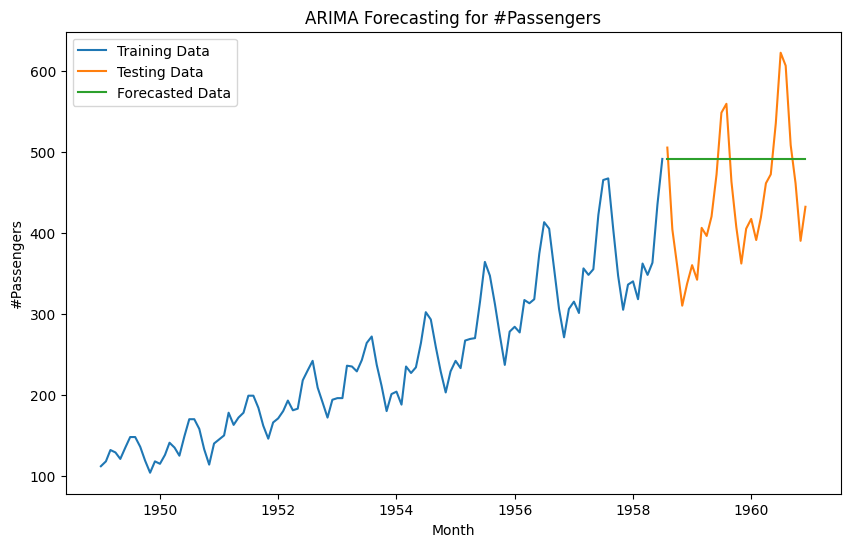

Root Mean Squared Error (RMSE): 93.13394136662937


In [20]:
def arima_model(data, target_variable, order):
    train_size = int(len(data) * 0.8)
    train_data, test_data = data[:train_size], data[train_size:]

    model = ARIMA(train_data[target_variable], order=order)
    fitted_model = model.fit()

    forecast = fitted_model.forecast(steps=len(test_data))

    rmse = np.sqrt(mean_squared_error(test_data[target_variable], forecast))

    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data[target_variable], label='Training Data')
    plt.plot(test_data.index, test_data[target_variable], label='Testing Data')
    plt.plot(test_data.index, forecast, label='Forecasted Data')
    plt.xlabel('Month')
    plt.ylabel(target_variable)
    plt.title('ARIMA Forecasting for ' + target_variable)
    plt.legend()
    plt.show()

    print("Root Mean Squared Error (RMSE):", rmse)

arima_model(data, '#Passengers', order=(0,1,0))

Name: Sneha Basyal M

Reg no: 212222240101